In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv("titanic.csv")
tit = titanic.copy()

# AGE
man = tit[(tit['Sex']=='male') & (tit['Survived']==1)]
man_no = tit[(tit['Sex']=='male') & (tit['Survived']==0)]
woman= tit[(tit['Sex']=='female')&(tit['Survived']==1)]
woman_no= tit[(tit['Sex']=='female')&(tit['Survived']==0)]

tit.loc[(tit['Sex']=='male')& (tit['Survived']==1) & (tit['Age'].isna()), 'Age']=man['Age'].mean()
tit.loc[(tit['Sex']=='male') & (tit['Survived']==0)&(tit['Age'].isna()), 'Age'] = man_no['Age'].mean()
tit.loc[(tit['Sex']=='female')&(tit['Survived']==1)&(tit['Age'].isna()), 'Age']=woman['Age'].mean()
tit.loc[(tit['Sex']=='female')&(tit['Survived']==0)&(tit['Age'].isna()), 'Age']=woman_no['Age'].mean()

# Fare
q1 = tit['Fare'].quantile(0.25)
q3 = tit['Fare'].quantile(0.75)
tit.loc[tit['Fare']==0.000000, 'Fare'] = q1
iqr = q3 - q1
low = q1 - iqr * 1.5
high = q3 + iqr * 1.5
tit['Fare'].clip(lower= low, upper= high, inplace=True)
tit['Fare'].describe()

# Cabin
cab_one = tit[(tit['Fare']<=q1)]
cab_two = tit[(tit['Fare']<tit['Fare'].median())&(tit['Fare']>q1)]
cab_three = tit[(tit['Fare']>tit['Fare'].median())&(tit['Fare']<q3)]
cab_four = tit[(tit['Fare']>q3)]

tit.loc[(tit['Fare']<= q1)&(tit['Cabin'].isna()),'Cabin'] = cab_one['Cabin'].mode()[0]
tit.loc[(tit['Fare'] > q1)&(tit['Cabin'].isna()),'Cabin'] = cab_two['Cabin'].mode()[0]
tit.loc[(tit['Fare'] > tit['Fare'].median())&(tit['Cabin'].isna()),'Cabin'] = cab_three['Cabin'].mode()[0]
tit.loc[(tit['Fare'] > q3)&(tit['Cabin'].isna()),'Cabin'] = cab_four['Cabin'].mode()[0]

#Embarked
tit['Embarked'].fillna(tit['Embarked'].mode()[0], inplace=True)


# Visualizations

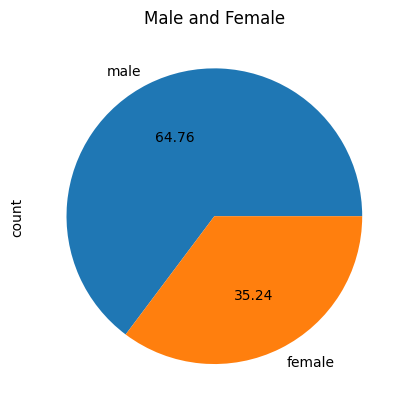

In [3]:
sex_count=tit['Sex'].value_counts()
sex_count.plot(kind='pie',autopct="%.2f",labels=tit['Sex'].values)
plt.title("Male and Female")
plt.show()

Text(0.5, 1.0, "Majority for People didn't survived")

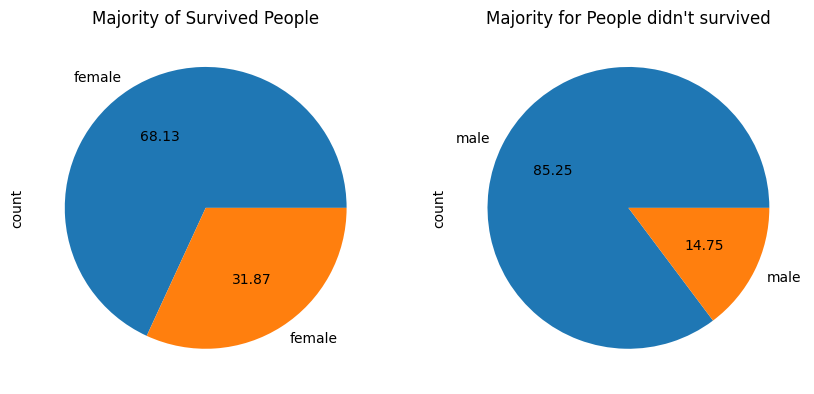

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
servived = man.merge(woman ,how="outer")
count=servived['Sex'].value_counts()
count.plot(kind="pie",autopct="%.2f",labels=servived['Sex'].values)
plt.title("Majority of Survived People")

plt.subplot(1,2,2)
n_survived = man_no.merge(woman_no,how="outer")
count_no = n_survived['Sex'].value_counts()
count_no.plot(kind="pie",autopct="%.2f",labels=n_survived["Sex"].values)
plt.title("Majority for People didn't survived")

Text(0.5, 1.0, "People's Age")

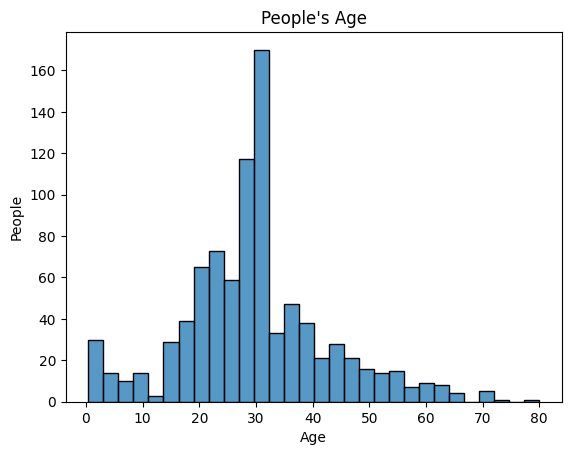

In [5]:
sns.histplot(data=tit["Age"])
plt.ylabel("People")
plt.title("People's Age")